In [1]:
#ensembling
from mlxtend.classifier import StackingCVClassifier
import numpy as np
import pandas as pd
import sys, os, glob
import imp
import seaborn as sns
sys.path.append('./src/')
import common_utils,my_ensembler, feature_utils, defines, model_utils, my_bert
from sklearn.neighbors import KNeighborsClassifier
from sklearn_crfsuite import scorers, CRF
from sklearn.pipeline import Pipeline
import json
from operator import itemgetter
from sklearn_crfsuite.utils import flatten
from sklearn_crfsuite.metrics import sequence_accuracy_score
from sklearn.linear_model import LogisticRegression

### Define static parameters for data

In [28]:
dir_name='reparse'
docs_map_name = 'scaled.binary.5_stop_docs_map.json'
crf_params_name='.802_21.07_07:26_best_params.json'
ens_crf_db_name   = 'ensemble_crf_cv_db_all'
ens_lg_db_name = 'ensemble_lg_cv_db_all'
cv_crf_bert_name = 'cv_crf_bert_all'
per_par=True
seq_len=3
step=3

### Load df with ensemble prediction

In [5]:
imp.reload(common_utils)
ens_crf_db=common_utils.load_db(dir_name,ens_crf_db_name)
ens_lg_db =common_utils.load_db(dir_name,ens_lg_db_name)

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/ensemble_crf_cv_db_all.csv,  index False
Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/ensemble_lg_cv_db_all.csv,  index False


Split 0
              precision    recall  f1-score   support

      is_nar       0.73      0.47      0.57       781
     not_nar       0.86      0.95      0.90      2597

    accuracy                           0.84      3378
   macro avg       0.79      0.71      0.73      3378
weighted avg       0.83      0.84      0.82      3378

Split 1
              precision    recall  f1-score   support

      is_nar       0.70      0.58      0.63      1045
     not_nar       0.86      0.91      0.88      2911

    accuracy                           0.82      3956
   macro avg       0.78      0.74      0.76      3956
weighted avg       0.81      0.82      0.82      3956

Split 2
              precision    recall  f1-score   support

      is_nar       0.72      0.38      0.50       915
     not_nar       0.81      0.95      0.87      2498

    accuracy                           0.79      3413
   macro avg       0.76      0.66      0.68      3413
weighted avg       0.78      0.79      0.77      3

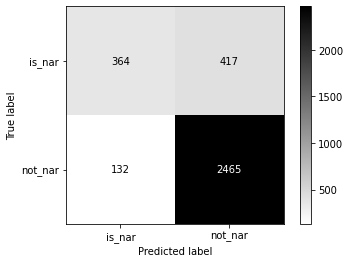

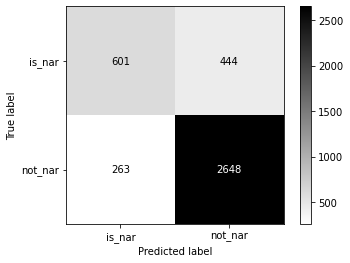

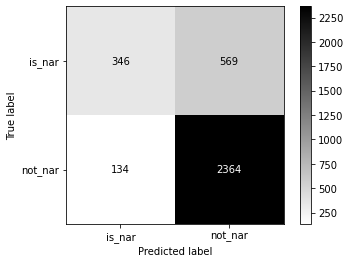

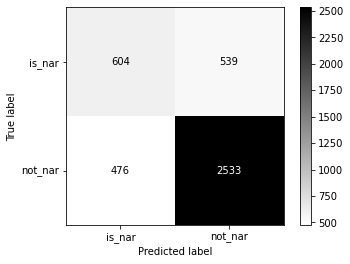

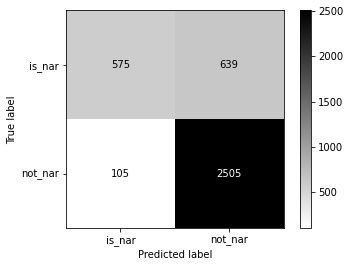

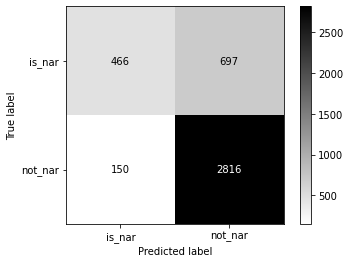

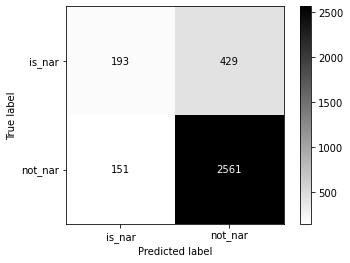

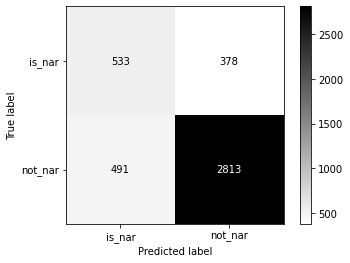

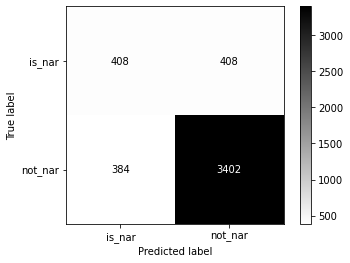

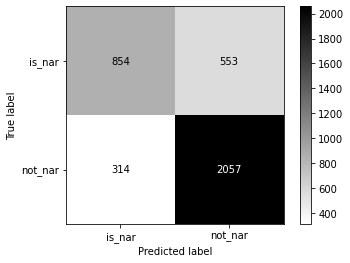

In [16]:
imp.reload(model_utils)
crf_scores=model_utils.get_report_from_splits(ens_crf_db,"ens")

In [22]:
crf_avg_f1=np.mean(crf_scores)
crf_avg_f1

0.7917160815492517

Split 0
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2597
           1       0.74      0.54      0.62       781

    accuracy                           0.85      3378
   macro avg       0.80      0.74      0.76      3378
weighted avg       0.84      0.85      0.84      3378

Split 1
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      2911
           1       0.68      0.35      0.46      1045

    accuracy                           0.78      3956
   macro avg       0.74      0.65      0.66      3956
weighted avg       0.77      0.78      0.76      3956

Split 2
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      2498
           1       0.70      0.35      0.46       915

    accuracy                           0.78      3413
   macro avg       0.75      0.65      0.66      3413
weighted avg       0.77      0.78      0.76      3

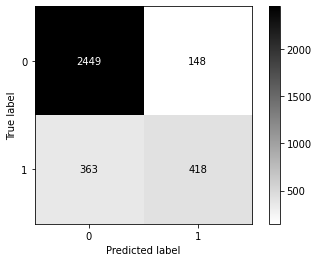

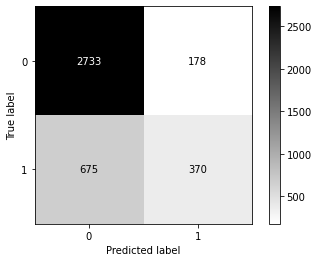

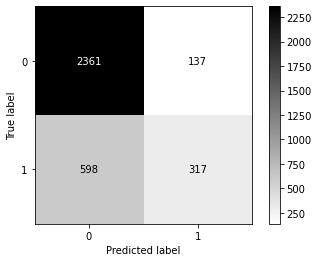

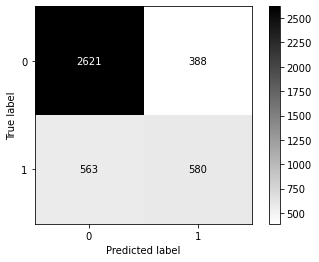

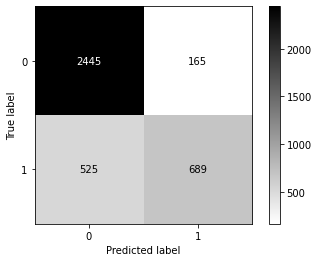

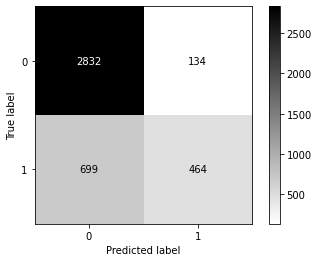

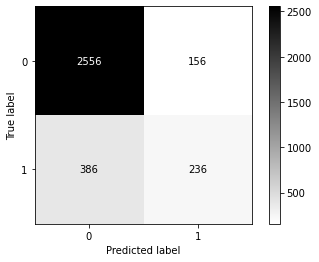

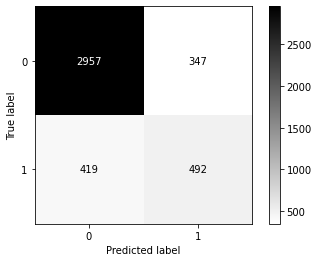

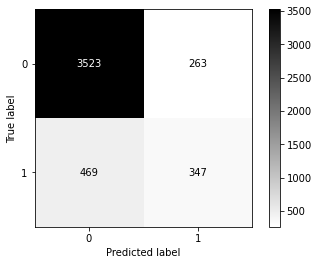

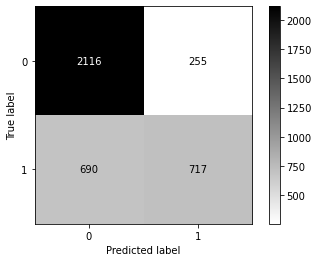

In [18]:
lg_score=model_utils.get_report_from_splits(ens_lg_db,"ens")

In [23]:
lg_avg_f1=np.mean(lg_score)
lg_avg_f1

0.7912278162505346

### Load merged predictions by CRF and BERT

In [29]:
cv_crf_bert = common_utils.load_db(dir_name,cv_crf_bert_name)
cv_crf_bert

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/cv_crf_bert_all.csv,  index False


,crf_group,crf_split,crf_predicted,crf_true,crf_proba_0,crf_proba_1,bert_group,bert_split,bert_predicted,bert_true,bert_proba_0,bert_proba_1
0,4,0,not_nar,not_nar,0.958612,0.041388,4,0,0,0,0.679904,0.320096
1,4,0,not_nar,not_nar,0.972640,0.027360,4,0,0,0,0.795950,0.204050
2,4,0,not_nar,not_nar,0.984728,0.015272,4,0,0,0,0.846528,0.153472
3,4,0,is_nar,not_nar,0.712459,0.287541,4,0,0,0,0.638051,0.361949
4,4,0,is_nar,not_nar,0.684794,0.315206,4,0,0,0,0.645552,0.354448
...,...,...,...,...,...,...,...,...,...,...,...,...
38776,79,9,not_nar,not_nar,0.969380,0.030620,79,9,0,0,0.797658,0.202342
38777,79,9,not_nar,not_nar,0.992972,0.007028,79,9,0,0,0.884325,0.115675
38778,79,9,not_nar,not_nar,0.993904,0.006096,79,9,0,0,0.889441,0.110559
38779,79,9,not_nar,not_nar,0.989410,0.010590,79,9,0,0,0.880385,0.119615


Split 0
              precision    recall  f1-score   support

      is_nar       0.69      0.58      0.63       781
     not_nar       0.88      0.92      0.90      2597

    accuracy                           0.84      3378
   macro avg       0.78      0.75      0.76      3378
weighted avg       0.83      0.84      0.84      3378

Split 1
              precision    recall  f1-score   support

      is_nar       0.58      0.30      0.40      1045
     not_nar       0.79      0.92      0.85      2911

    accuracy                           0.76      3956
   macro avg       0.68      0.61      0.62      3956
weighted avg       0.73      0.76      0.73      3956

Split 2
              precision    recall  f1-score   support

      is_nar       0.63      0.40      0.49       915
     not_nar       0.81      0.91      0.86      2498

    accuracy                           0.77      3413
   macro avg       0.72      0.66      0.67      3413
weighted avg       0.76      0.77      0.76      3

0.7823887876502014

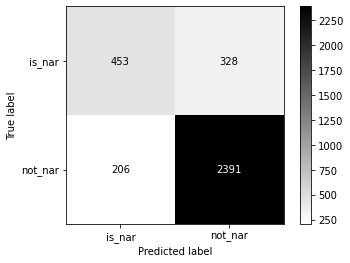

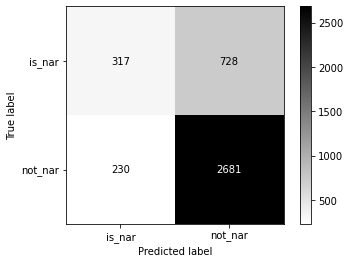

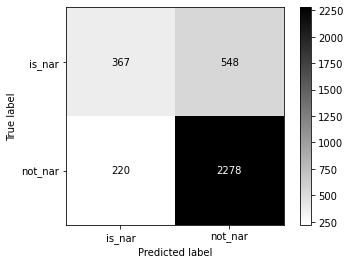

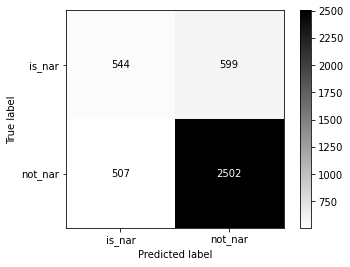

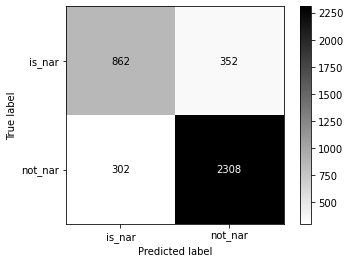

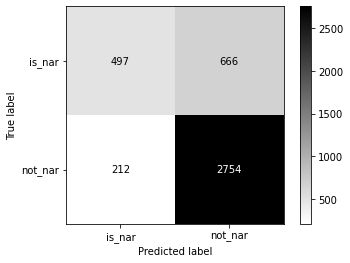

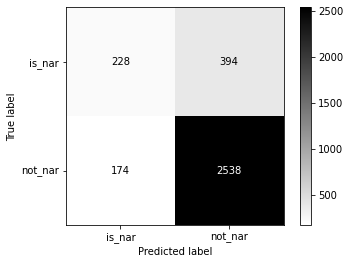

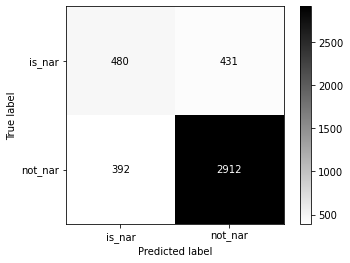

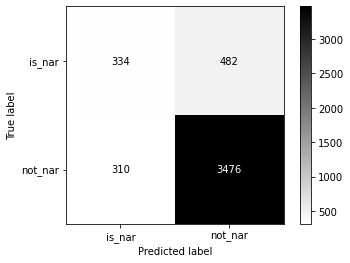

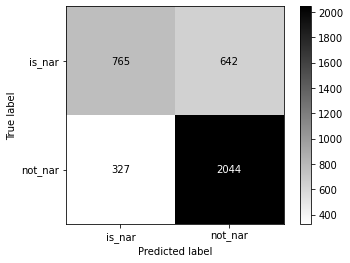

In [32]:
crf_alone_score=model_utils.get_report_from_splits(cv_crf_bert,"crf")
crf_alone_avg_f1=np.mean(crf_alone_score)
crf_alone_avg_f1

Split 0
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2597
           1       0.50      0.56      0.53       781

    accuracy                           0.77      3378
   macro avg       0.68      0.70      0.69      3378
weighted avg       0.78      0.77      0.77      3378

Split 1
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      2911
           1       0.47      0.59      0.52      1045

    accuracy                           0.72      3956
   macro avg       0.65      0.68      0.66      3956
weighted avg       0.74      0.72      0.73      3956

Split 2
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2498
           1       0.54      0.55      0.55       915

    accuracy                           0.76      3413
   macro avg       0.69      0.69      0.69      3413
weighted avg       0.76      0.76      0.76      3

0.7462080370656878

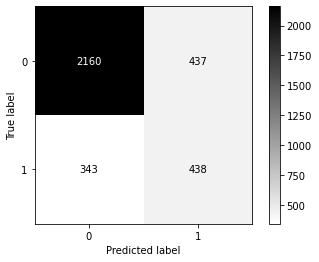

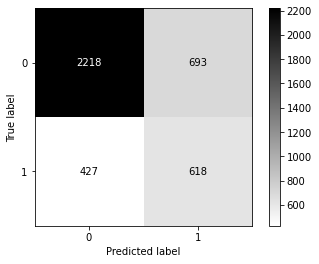

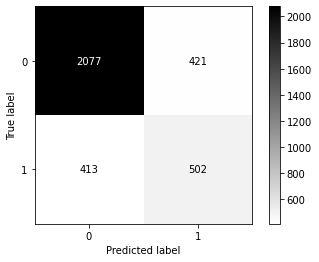

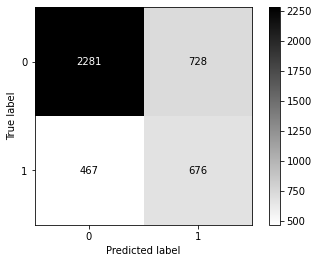

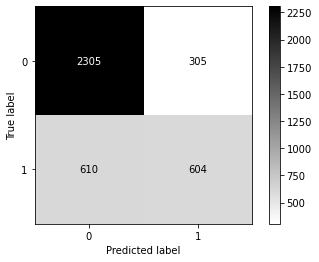

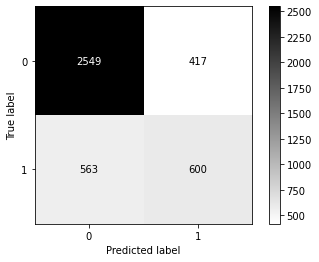

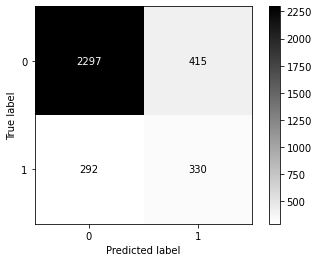

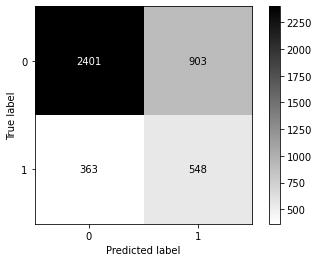

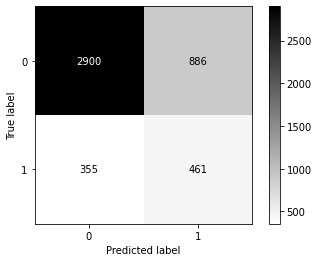

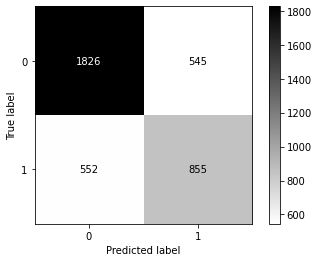

In [33]:
bert_alone_score=model_utils.get_report_from_splits(cv_crf_bert,"bert")
bert_alone_avg_f1=np.mean(bert_alone_score)
bert_alone_avg_f1

In [36]:
avg_f1={}
avg_f1['crf_alone_avg_f1']=crf_alone_avg_f1
avg_f1['bert_alone_avg_f1']=bert_alone_avg_f1
avg_f1['crf_avg_f1']=crf_avg_f1
avg_f1['lg_avg_f1']=lg_avg_f1

In [37]:
avg_f1

{'crf_alone_avg_f1': 0.7823887876502014,
 'bert_alone_avg_f1': 0.7462080370656878,
 'crf_avg_f1': 0.7917160815492517,
 'lg_avg_f1': 0.7912278162505346}

In [40]:
sent_db=common_utils.concat_dbs(dir_name,'sent_db',cols=['par_idx_in_doc'])
sent_db

,doc_idx,sent_idx,par_idx_in_doc
0,1,0,0.0
1,1,1,1.0
2,1,2,2.0
3,1,3,3.0
4,1,4,4.0
...,...,...,...
38776,80,525,222.0
38777,80,526,222.0
38778,80,527,222.0
38779,80,528,223.0
